##MNIST Digits Classification with Multilayer Perceptron

In [33]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Parameter Settings

In [34]:
batch_size = 128
num_classes = 10
epochs = 20

Spliting Data into Training and Test Set

In [35]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

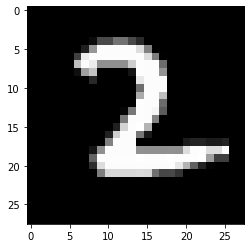

In [37]:
ind = 252
sample_img = x_train[ind]
pixels = sample_img.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()

Preprocess Input Images

In [38]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [39]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [41]:
x_train.shape

(60000, 784)

In [42]:
x_train[0,:].shape

(784,)

In [43]:
y_train.shape

(60000, 10)

###Building the ANN with Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [44]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [45]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 16s 33ms/step - loss: 0.2416 - accuracy: 0.9253 - val_loss: 0.1240 - val_accuracy: 0.9611
Epoch 2/20
469/469 [==============================] - 13s 29ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.0851 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 14s 31ms/step - loss: 0.0750 - accuracy: 0.9774 - val_loss: 0.0799 - val_accuracy: 0.9777
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0911 - val_accuracy: 0.9757
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0777 - val_accuracy: 0.9809
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0711 - val_accuracy: 0.9842
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0844 - val_accuracy: 0

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting History and Accuracy

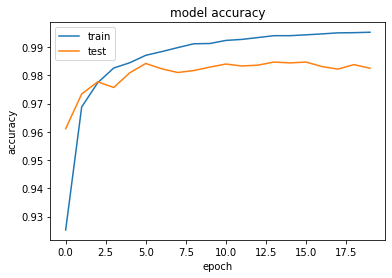

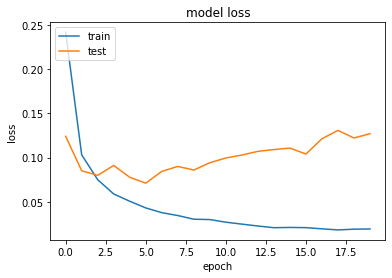

In [47]:
import matplotlib.pyplot as plt

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize History for the Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Making Prediction

313/313 [==============================] - 2s 5ms/step


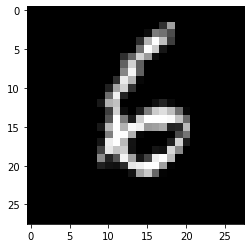

Real label: 6
Predicted label: 6


In [49]:
predicted = model.predict(x_test) 

ind = 2000
sample_image = x_test[ind]

pixels = sample_image.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()

print('Real label:', np.argmax(y_test[ind]))
print('Predicted label:', np.argmax(predicted[ind]))

313/313 [==============================] - 1s 4ms/step


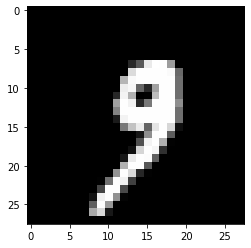

 Real label : 9
 Predicted label: 9


In [50]:
predicted = model.predict(x_test)

ind = 1000
sample_image = x_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))